In [31]:
'''
   Creating a logistic regression model that depicts the probability of getting a job, given an educational code. When the education is low, the probability of getting a job is 0 or nill, whereas, when the education is high, the probability of getting a job is 1 or 100%
'''

'\n   Creating a logistic regression model that depicts the probability of getting a job, given an educational code. When the education is low, the probability of getting a job is 0 or nill, whereas, when the education is high, the probability of getting a job is 1 or 100%\n'

In [32]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
# Loading the data 

dfa = pd.read_csv(r'E:\newes\Datasets\REGRsample.csv')

In [34]:
dfa.describe()

,code,salary
count,11.000000,11.000000
mean,3.545455,27636.363636
std,1.863525,11155.919749
min,1.000000,15000.000000
25%,2.000000,17500.000000
50%,4.000000,28000.000000
75%,5.000000,35000.000000
max,6.000000,45000.000000


In [35]:
dfa

,education,code,salary,job
0,matric,1,15000,yes
1,fa,2,18000,no
2,ba,3,22000,yes
3,master,4,28000,yes
4,ms,5,35000,yes
5,phd,6,45000,yes
6,master,4,28000,yes
7,ms,5,35000,yes
8,phd,6,45000,yes
9,matric,1,16000,no


In [36]:
# Creating a second dataframe

ndata = pd.DataFrame({'education':['ba', 'master', 'ms', 'phd'],
                      'code':[3, 4, 5, 6],
                      'salary':[20000, 26000, 33000, 50000],
                      'job':['no', 'yes', 'no', 'yes']
                     })

In [37]:
# Appending the second dataframe to the first dataframe(dfa) and assigning it into a new variable(dfb)
dfb = dfa.append(ndata, ignore_index=True)

In [38]:
# print out the shape of the dfb dataframe (rows, columns)
dfb.shape

(15, 4)

In [39]:
# Copying the merged dataframe into a new variable
data = dfb.copy()
# Mapping the 'job' column values in the new dataframe(data) into boolean datatype for quantitative analysis
data['job'] = data['job'].map({'yes':1, 'no':0})
#print out data dataframe
data

,education,code,salary,job
0,matric,1,15000,1
1,fa,2,18000,0
2,ba,3,22000,1
3,master,4,28000,1
4,ms,5,35000,1
5,phd,6,45000,1
6,master,4,28000,1
7,ms,5,35000,1
8,phd,6,45000,1
9,matric,1,16000,0


In [40]:
y = data['job']
x1 = data['code']

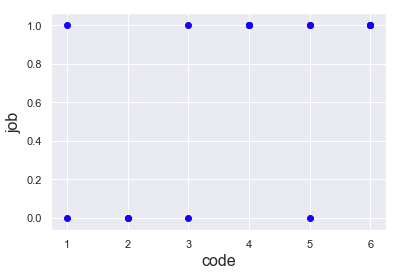

In [41]:
# Using scatter plot in matplotlib for visualization
plt.scatter(x1,y, color='#1300fd')
plt.xlabel('code', fontsize=16)
plt.ylabel('job', fontsize=16)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


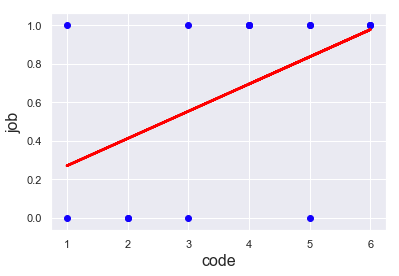

In [42]:
#Linear regression approach

x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()
plt.scatter(x1,y, color='#1300fd')
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat, lw=2.5, color='#fd0000')
plt.xlabel('code', fontsize=16)
plt.ylabel('job', fontsize=16)
plt.show()

Optimization terminated successfully.
         Current function value: 0.500413
         Iterations 6


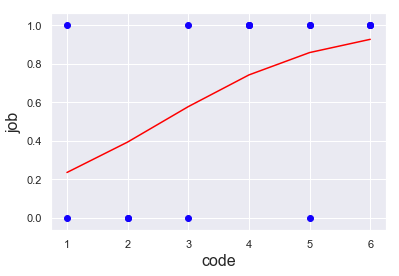

In [43]:
#Non-linear approach; our y-axis values are bounded between 0 and 1. Logistic regression curve

reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))
f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='#1300fd')
plt.xlabel('code', fontsize=16)
plt.ylabel('job', fontsize=16)
plt.plot(x_sorted, f_sorted, color='#fd0000')
plt.show()

In [44]:
# Logistic Regression summary
'''MLE : Maximum Likelyhood Estimation.
   Pseudo R-squared (Pseudo R-squ) : useful for comparing variation of the same model, values between 0.2 and 0.4 considered decent.
   LL-Null : Log Likelihood-null. The log-likelihood of a model which has no independent variables.
   LLR : Log Likelihood Ratio, measures if our model is statistically different from LL-Null.
'''

results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    job   No. Observations:                   15
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2138
Time:                        17:19:47   Log-Likelihood:                -7.5062
converged:                       True   LL-Null:                       -9.5477
                                        LLR p-value:                   0.04332
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9239      1.533     -1.255      0.210      -4.929       1.081
code           0.7458      0.424      1.758      0.079      -0.086       1.577
==============================================================================
"""

In [45]:
# Calculating the accuracy of the model using the results_log.predict() command to return the values predicted by our model.
# Value less than 0.5 means chances of getting jobs is below 50% and the value 0.93 means the chances of getting job is 93%.

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.24, 0.39, 0.58, 0.74, 0.86, 0.93, 0.74, 0.86, 0.93, 0.24, 0.39,
       0.58, 0.74, 0.86, 0.93])

In [46]:
# Actual values from the dataset
np.array(data['job'])

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [47]:
# If 90% of the predicted values of the model match with the actual values of the model, we say that the model has 90% accuracy.
# To compare the predicted and actual values in form of table we use the results_log.pred_table()

results_log.pred_table()

array([[3.00, 2.00],
       [1.00, 9.00]])

In [48]:
# Take the results in the cell above in form of confusion matrix

'''
   For 3 observations the model predicted 0 and the actual vale was also 0, similarly, for 9 observations the model predicted 1 and the actual value was also 1 == good predictions
   For 2 observations the model predicted 0 whereas, the actual value was 1, similarly, 1 observation the model predicted 1 and the actual value was 0 == model got confused.
   Depiction from the confusion matrix, the model made an accurate estimation in 12 out of 15 cases which means our model works with (12/15)*100 = 80% accuracy.
'''

cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,3.0,2.0
Actual 1,1.0,9.0


In [49]:
# We can also calculate the accuracy of the model by using this code
cm = np.array(cm_df)
accuracy_model = (cm[0,0]+cm[1,1])/cm.sum()*100
accuracy_model

80.0